## **Desvendando a Mega-Sena: Uma análise estatística completa** ##

A Mega-Sena é a loteia mais popular do Brasil, atraindo milhões de apostadores em busca do sonho de se tornar milhonario. Mas o que os números nos dizem? Existem algum padrão oculto nos sorteios? Nessa analise, aplicarei alguns conceitos que venho estudando para descobrir tendências, padrões e curiosidades estatísticas.


Fazendo o uso de técnicas de analise de dados e visualização, examinei 2864 concursos da Mega-Sena, revelando comportamentos interessantes que desafiam algumas crenças populares e confirmam outras. Aqui, minha ideai não é descobrir uma "formula mágica" para ganhar na loteria, mais sim apresentar uma visão baseada em dados sobre como os números se comportam ao longo do tempo.

**Frequância dos números: Existem "números de sorte"?**

Uma dos primeiros questionamentos que fazemos ao analisar os resultados da loteria é se algum do números são sorteados com maior frequência que outros.

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Camargo098/Portifolio/refs/heads/main/analise_resultados_mega-sena/resultados_mega-sena.csv'
df = pd.read_csv(url)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeros = df[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']].stack()
frequencia_numeros = numeros.value_counts().sort_index()

# Obtendo o número com a maior frequência
numero_mais_frequente = frequencia_numeros.idxmax()
frequencia_maxima = frequencia_numeros.max()

# Obtendo o número com a menor frequência
numero_menos_frequente = frequencia_numeros.idxmin()
frequencia_minina = frequencia_numeros.min()


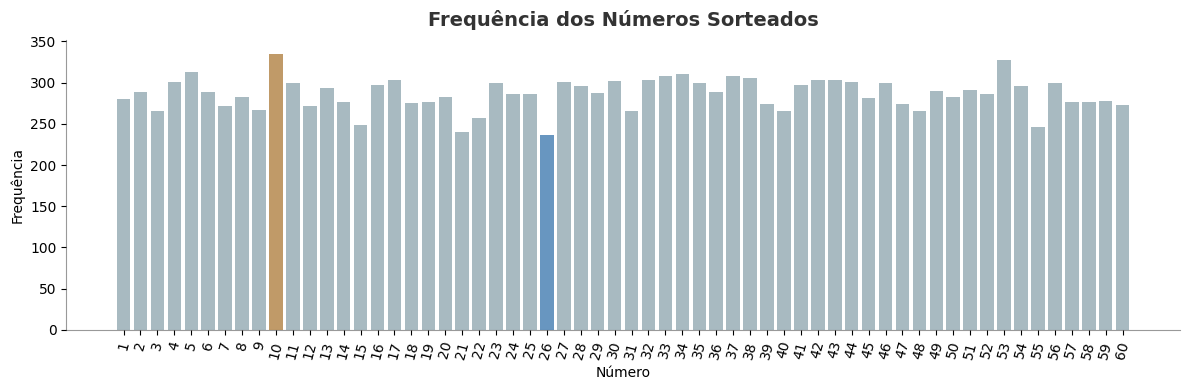

In [12]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.bar(frequencia_numeros.index, frequencia_numeros.values,color="#849DA7", alpha=0.7)
plt.bar(numero_mais_frequente, frequencia_maxima, color="#C09A68", label='Mais Frequênte')
plt.bar(numero_menos_frequente, frequencia_minina, color='#6896C0', label='Menos Frequênte')

ax.set_xlabel("Número")
ax.set_ylabel("Frequência")
ax.set_title('Frequência dos Números Sorteados', fontweight='bold', color="#333333", fontsize=14, pad=10)

ax.set_xticks(range(1, 61))
ax.set_xticklabels(range(1, 61), rotation=75)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(0.4)
ax.spines['bottom'].set_alpha(0.4)

plt.tight_layout()
plt.show()

In [4]:
frequencia_media = np.mean(frequencia_numeros.values)
dif_frquencia_maxima = (frequencia_maxima - frequencia_media) / frequencia_media * 100
dif_frquencia_mimima = (frequencia_minina - frequencia_media) / frequencia_media * 100 

print(frequencia_media)
print(f'{dif_frquencia_maxima:.2f}')
print(f'{dif_frquencia_mimima:.2f}')

286.4
16.97
-17.60


Segundo os dados, a frequência média de aparição de cada número é de 286.4 vezes ao longo dos 2864 concursos analisados. No entando, existem variações significativas: 
- O número mais frequênte é o 10, sorteado 335 vezes (16.9% acima da média)
- O número menos frequênte é o 26, sorteado 236 vezes (17.6 % abaixo da média)

**Paridade: O Equilibrio Entre Pares e Ímpares**

Muito apostadores acreditam que uma boa estratégia é equilibrar números paras e ímpares em suas apostas. Analisei a distribuição de numeros pares em todos os sorteios para verificar se existe algum padrão.

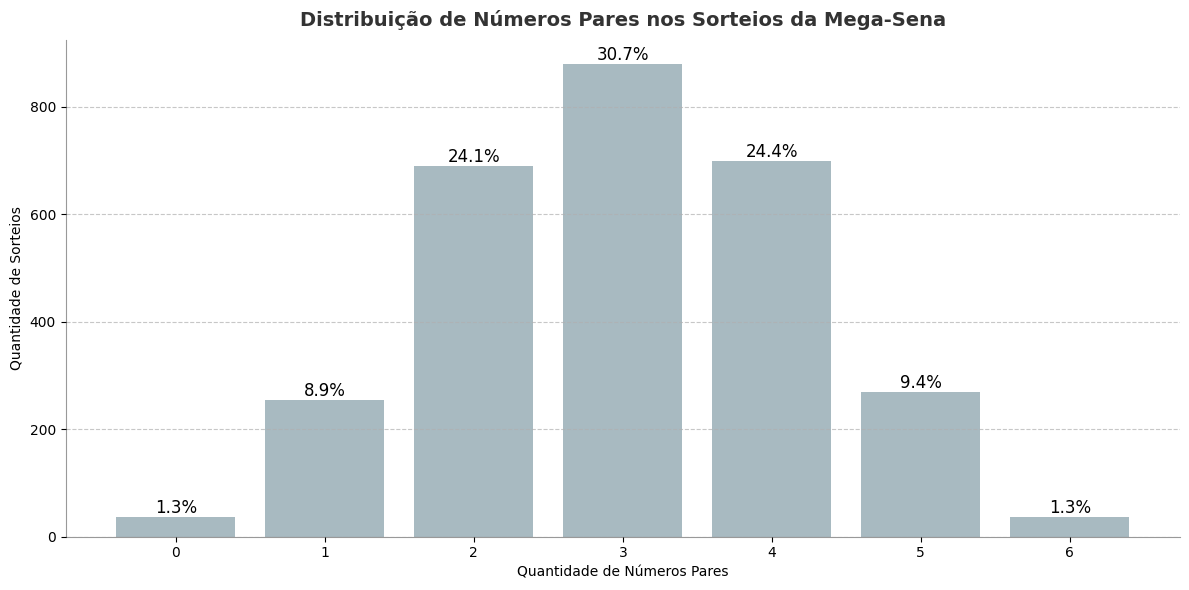

In [5]:
numeros = df[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']]
num_pares_por_sorteio = []
for index, row in numeros.iterrows():
    conte_pares = sum(1 for num in row if num % 2 == 0)
    num_pares_por_sorteio.append(conte_pares)

distribuicao_pares = pd.Series(num_pares_por_sorteio)
frequencia_distribuicao_pares = distribuicao_pares.value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(frequencia_distribuicao_pares.index, frequencia_distribuicao_pares.values, color="#849DA7", alpha=0.7)

total_sorteios = len(numeros)
for bar in bars:
    height = bar.get_height()
    percentage = f'{height / total_sorteios * 100:.1f}%'
    ax.text(bar.get_x() + bar.get_width() / 2., height * 1, percentage,
            ha='center', va='bottom', fontsize=12)

ax.set_xlabel('Quantidade de Números Pares')
ax.set_ylabel('Quantidade de Sorteios')
ax.set_title('Distribuição de Números Pares nos Sorteios da Mega-Sena', fontweight='bold', color="#333333", fontsize=14, pad=10)
ax.set_xticks(np.arange(0, 7, 1))
ax.grid(axis='y', linestyle='--', alpha=0.7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(0.4)
ax.spines['bottom'].set_alpha(0.4)

plt.tight_layout()
plt.show()

- A combinação mais comum é de 3 números pares e 3 ímpares, ocorrendo em 30,7% das dados analisados.
- As combinações de 2 pares/4 ímpares e 4 pares/2 ímpares são quase igualmente possiveis, ocorrendo em aproximadamente 24% dos sorteios.
- Sorteios com todos os números pares ou ímpares são extremamente raros, representando apenas 1,3% do casos.

Estes dados sugerem que, embora o equilibrio perfeito (3 pares e 3 ímpares) seja o resultado mais comum, há distribuição relativamente uniforme 2, 3 e 4 números pares, que juntos representam quase 80% de todos os sorteios

**A Soma dos Números: Um Indicador Importante**

A soma dos 6 números sorteados é uma estatística interessante que pode revelar padrões não evidentes na análise individual dos números.

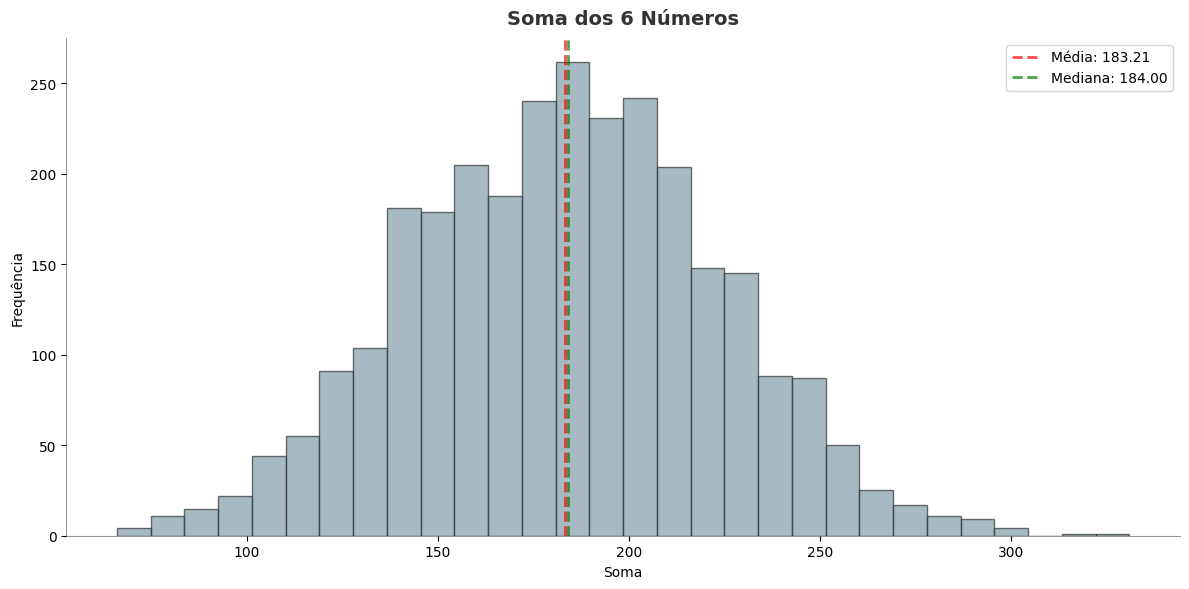

Maior soma: 331
Menor soma: 66


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

soma_por_sorteio = numeros.sum(axis=1)
media_somas = soma_por_sorteio.mean()
mediana_somas = soma_por_sorteio.median()
menor_soma = soma_por_sorteio.min()
maior_soma = soma_por_sorteio.max()

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(soma_por_sorteio, color='#849DA7', edgecolor='#333333', bins=30, alpha=0.7)
ax.axvline(media_somas, color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'Média: {media_somas:.2f}')
ax.axvline(mediana_somas, color='green', linestyle='--', linewidth=2, alpha=0.7, label=f'Mediana: {mediana_somas:.2f}')

ax.set_xlabel('Soma')
ax.set_ylabel('Frequência')
ax.set_title('Soma dos 6 Números', fontweight='bold', color="#333333", fontsize=14, pad=10)
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(0.4)
ax.spines['bottom'].set_alpha(0.4)

plt.tight_layout()
plt.show()

print(f'Maior soma: {maior_soma}')
print(f'Menor soma: {menor_soma}')

A análise revelou que:
- A soma média do seis números sorteados é de 183,21
- A mediana é de 184,00
- A menor soma foi de 66
- A maior soma foi de 331

O gráfico mostra uma distribuição que se aproxima de uma curva normal (gaussiana), com a maioria dos sorteios apresentando somas entre 150 e 220. Está distribuição é esperada devido ao Teorema do limite central, que prevê que a soma de variaveis aleatórias independentes tendem a seguir uma distribuição normal.

Esta informação pode ser útil para apostadores que desejam fazer escolhas mais informadas: apostas com somas muito baixa (abaixo de 100) ou muito altas (acima de 270) são estatisticamente menos provaveis de ocorrer.

**Números Consecutivos: Mais Comuns do que se Imagina**

Muitos apostadores evitam escolher números consecutivos, acreditando que eles raramente aparecem juntos. Mas o que os dados realmente mostram?

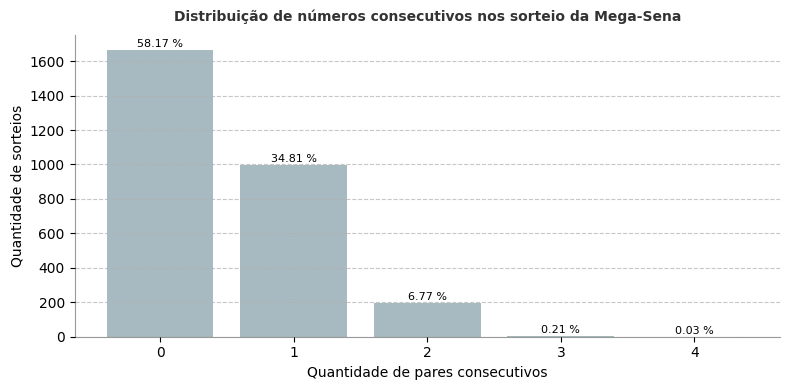

In [32]:
quantidade_consecutivos_por_sorteio = []

for index, row in numeros.iterrows():
    numeros_sorteados = sorted([row['Bola1'], row['Bola2'], row['Bola3'], row['Bola4'], row['Bola5'], row['Bola6']])

    pares_consecutivos = 0
    for i in range(len(numeros_sorteados) -1):
        if numeros_sorteados[i+1] == numeros_sorteados[i] + 1:
            pares_consecutivos += 1

    quantidade_consecutivos_por_sorteio.append(pares_consecutivos)

distribuicao_consecutivos = pd.Series(quantidade_consecutivos_por_sorteio)
frequencia_consecutivos = distribuicao_consecutivos.value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(frequencia_consecutivos.index, frequencia_consecutivos.values, color='#849DA7', alpha=0.7)

ax.set_xlabel('Quantidade de pares consecutivos')
ax.set_ylabel('Quantidade de sorteios')
ax.set_title('Distribuição de números consecutivos nos sorteio da Mega-Sena', fontweight='bold', color="#333333", fontsize=10, pad=10)

plt.xticks(np.arange(0, len(frequencia_consecutivos), 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

total_sorteios = len(numeros)
for bar in bars:
    height = bar.get_height()
    percentage = f'{height / total_sorteios * 100:.2f} %'
    plt.text(bar.get_x() + bar.get_width() / 2., height + 5, percentage, ha='center', va='bottom', fontsize=8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(0.4)
ax.spines['bottom'].set_alpha(0.4)

plt.tight_layout()
plt.show();

A análise revelou que:
- Em 58,17% dos sorteios, não houve nenhum par de números consecutivos
- Em 34,81%, houve exatemente um par de números consecutivos
- Em 6,77%, houve dois pares consecutivos
- Sorteios com três ou mais pares consecutivos são extremamente raros (menos de 0,3%)

Estes dados desafiam parcialmemte a crença popular: embora a maioria dos sorteios não apresentarem números consecutivos, mais de 40% dos sorteio tem ao menos um par de números consecutivos. Isso sugere que evitar completamente números consecutivos pode não ser uma estratégia estatisticamente fundamentada.

**Repetição de Números Entre Sorteios Consecutivos**

Uma questão frequênte entre os apostadores é se os números do último sorteio têm maior ou menor probabilidade de serem sorteados novamente. 

Sem repetições: 52.1%
1 número repetido: 38.9%
2 números repetidos: 8.1%
3+ números repetidos: 0.8%


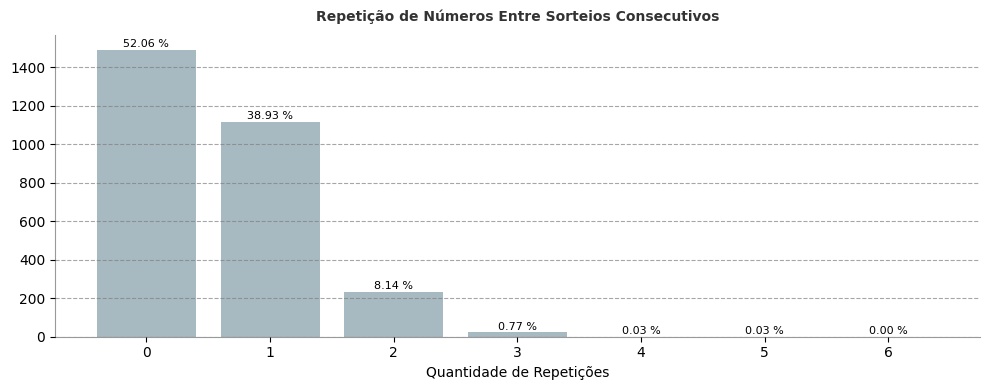

In [36]:
contagem = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}

for i in range(1, len(df)):
    anterior = set([df[f'Bola{j}'].iloc[i-1] for j in range(1, 7)])
    atual = set([df[f'Bola{j}'].iloc[i] for j in range(1, 7)])

    repetidos = len(anterior.intersection(atual))
    contagem[repetidos] += 1

total_pares = len(df) - 1
porcentagens = {k: (v/total_pares)*100 for k, v in contagem.items()}

print(f"Sem repetições: {porcentagens[0]:.1f}%")
print(f"1 número repetido: {porcentagens[1]:.1f}%")
print(f"2 números repetidos: {porcentagens[2]:.1f}%")
print(f"3+ números repetidos: {sum(v for k, v in porcentagens.items() if k >= 3):.1f}%")

df_contagens = pd.DataFrame(list(contagem.items()), columns=['Repeticoes', 'Ocorrencias']
)

fig, ax = plt.subplots(figsize=(10, 4))

bars = ax.bar(df_contagens['Repeticoes'], df_contagens['Ocorrencias'], color='#849DA7', alpha=0.7)

ax.set_title('Repetição de Números Entre Sorteios Consecutivos', fontweight='bold', color="#333333", fontsize=10, pad=10)
ax.set_xlabel('Quantidade de Sorteios')
ax.set_xlabel('Quantidade de Repetições')

plt.grid(axis='y', linestyle='--', alpha=0.7, color='grey')

total_sorteios = len(numeros)
for bar in bars:
    height = bar.get_height()
    percentage = f'{height / total_sorteios * 100:.2f} %'
    plt.text(bar.get_x() + bar.get_width() / 2., height +5, percentage, ha='center', va='bottom', fontsize=8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(0.4)
ax.spines['bottom'].set_alpha(0.4)

plt.tight_layout()
plt.show()

A análise revelo que:
- Em 52,06% dos casos, nenhum número se repete do sorteio anterior para o atual.
- Em 38,93% dos casos, 1 número se repete.
- Em 8,14% dos casos, dois números se repetem
- Casos com três ou mais números repetidos são extremamente raros (menor de 1%)

Estes dados sugerem que, embora a ausência de repetições seja o cenario mais comum, a repatição de pelo menos um número ocorre em quase a metade dos sorteios consecutivos. Isso contradiz a crença de que os números do último sorteio devem ser evitados.

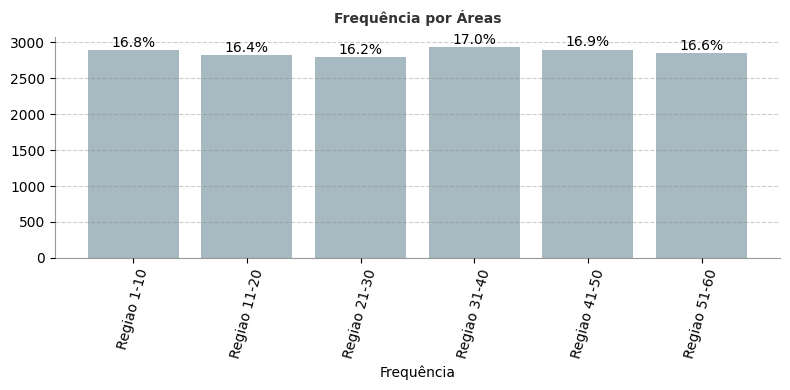

In [44]:
regioes = [
    (1, 10),
    (11, 20),
    (21, 30),
    (31, 40),
    (41, 50),
    (51, 60)
]

# Criando o dicionário com as chaves exatas que serão usadas
contagem_regioes = {
    'Regiao 1-10': 0,
    'Regiao 11-20': 0,
    'Regiao 21-30': 0,
    'Regiao 31-40': 0,
    'Regiao 41-50': 0,
    'Regiao 51-60': 0
}

for i in range(len(numeros)):
    for j in range(1, 7):
        numero = numeros[f'Bola{j}'].iloc[i]
        for inicio, fim in regioes:
            if inicio <= numero <= fim:
                contagem_regioes[f'Regiao {inicio}-{fim}'] += 1
                break

df_regioes = pd.DataFrame(list(contagem_regioes.items()), columns=['Regiao', 'Ocorrencias'])

fig, ax = plt.subplots(figsize=(8,4))

bars = ax.bar(df_regioes['Regiao'], df_regioes['Ocorrencias'], color='#849DA7', alpha=0.7)

plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', color='grey', alpha=0.4)

total_sorteios = sum(df_regioes['Ocorrencias'])
for bar in bars:
    height = bar.get_height()
    percentage = f'{height / total_sorteios * 100:.1f}%'
    plt.text(bar.get_x() + bar.get_width() / 2., height + 5, percentage,
             ha='center', va='bottom', fontsize=10)

ax.set_title('Frequência por Áreas', fontweight='bold', color="#333333", fontsize=10, pad=10)
ax.set_xlabel('Áreas')
ax.set_xlabel('Frequência')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(0.4)
ax.spines['bottom'].set_alpha(0.4)

plt.tight_layout()
plt.show()

Podemos observar que a distribuição é bastante uniforme entre todas as regiões, com uma variação máxima de 5% entre a região mais frequênte (31-40) e a menos frequênte (21-30). Isso sugere que não há vantagem estatística em contrar apostas em determinadas regiões de números

**Aleatoriedade e Probabilidade: A Matematica por Trás da Mega-Sena**

Uma análise completa da Mega-Sena não seria uma análise completa sem abordar dois conceitos fundamentais: a aleatóriedade dos sorteios e as probabilidades envolvidas. Nessa seção vamos explorar esses aspectos para demonstrar como a matemática explica o funcionamento deste jogo.

<h4><b>Testando a aleatoriedade dos sorteios</h4></b>
Uma pergunta frequente entre os jogadores é: "Os sorteios da Mega-Sena são realmente aletórios?". Podemos tentar responde isso aplicando um teste estatístico.

In [47]:
from scipy.stats import chisquare

frequencia_numeros

total_sorteios  = len(numeros) * 6
esperado = total_sorteios / 60

chi2_stat, p_value = chisquare(f_obs=frequencia_numeros, f_exp=esperado)

print(f"Estatística Chi-Quadrado: {chi2_stat:.2f}")
print(f"Graus de liberdade: {len(frequencia_numeros) - 1}")
print(f"P-valor: {p_value:.4f}")

Estatística Chi-Quadrado: 77.62
Graus de liberdade: 59
P-valor: 0.0525


**1. Teste Chi-Quadrado para uniformidade**

O teste Chi-Quadrado verifica se a distribuição de frequências dos números sorteados é uniforme, como seria esperado em um processo verdadeiramente aleatório. Os reusltados fora:

- Estatistica Chi-Quadrado: 77,62
- Graus de liberdade: 59
- P-valor: 0,0525

Com um p-valor ligeiramente acima do limiar convencional de significância (0,05), não há evidência estatística suficiente para rejeitar a hipótese de uniformidade. Em termos simples, isso significa que as variações na frequência dos números estão dentro do esperado para um processo aleatório.

<h4><b>

**Compreendendo as Probabilidades**

Entende as probabilideade envolvidas na Mega-Sena é essencial para  qualquer apostador.

In [ ]:
import math
import pandas as pd

total_numeros = 60
numeros_sorteados = 6 

espaco_amostral_total = math.comb(total_numeros, numeros_sorteados)
print(f"Espaço Amostral Total (C({total_numeros},{numeros_sorteados})): {espaco_amostral_total}")

probabilidade_1_aposta = 1 / espaco_amostral_total
print(f'Probabilidade de acerto com 1 aposta (6 números): {probabilidade_1_aposta * 100:.7f}%')

quantidade_apostas = range(6, 16)

probabilidades = []
chances_1_em = []

probabilidades_formatadas = []

for k_apostado in quantidade_apostas:
    combinacoes_favoraveis = math.comb(k_apostado, numeros_sorteados)
    probabilidade = combinacoes_favoraveis / espaco_amostral_total
    
    probabilidades.append(probabilidade)
    
    probabilidades_formatadas.append(f"{probabilidade:.7f}") 

    chances_1_em.append(f"1 em {int(1 / probabilidade):,}".replace(',', '.'))

df_probabilidades = pd.DataFrame({
    'Quantidade de Números Apostados': list(quantidade_apostas),
    'Probabilidade': probabilidades, 
    'Probabilidade_Formatada': probabilidades_formatadas,
    'Chance_1_em_Label': chances_1_em
})

Espaço Amostral Total (C(60,6)): 50063860
Probabilidade de acerto com 1 aposta (6 números): 0.0000020%


A probabilidade de acertar os 6 números com uma aposta simples é 1 em 50.053.860, ou aproximadamente 0,000002%

In [ ]:
df_probabilidades

,Quantidade de Números Apostados,Probabilidade,Probabilidade_Formatada,Chance_1_em_Label
0,6,1.997449e-08,0.0000000,1 em 50.063.860
1,7,1.398214e-07,0.0000001,1 em 7.151.980
2,8,5.592857e-07,0.0000006,1 em 1.787.995
3,9,1.677857e-06,0.0000017,1 em 595.998
4,10,4.194643e-06,0.0000042,1 em 238.399
5,11,9.228214e-06,0.0000092,1 em 108.363
6,12,1.845643e-05,0.0000185,1 em 54.181
7,13,3.427622e-05,0.0000343,1 em 29.174
8,14,5.998339e-05,0.0000600,1 em 16.671
9,15,9.997232e-05,0.0001000,1 em 10.002


Observe como a probabilidade cresce exponencialmente: 
- Com 6 números: 1 em 50.063.860
- Com 10 números: 1 em 238.399 (210 vezes maior)
- Com 15 números: 1 em 10.002 (5.000 vezes maior)

No entanto é importante notar que o custo da sposta também aumenta significativamente. Uma aposta com 15 números custa 10.000 vezes mais que uma posta simples, enquanto a probabilidade de ganhar aumenta "apenas" 5.000 vezes.

<h4><b>Conclusões</b></h4>

Após está análise, podemos destacar alguns insights importantes:

- 1. <b>Frequência dos números:</b> Embora existam variações na frequência em que cada número é sorteado, estas diferenças estão dentro do esperado para um sistema aleatório e não fornecem uma vantagem estatística significativa.
- 2. <b>Equilibrio de paridade:</b> A combinação mais comum é de 3 números pares e 3 números ímpares, mas combinações com 2 ou 4 números pares também são bastante frequentes. Evitar apostas com todos os números pares ou ímpares parece ser uma estratégia estatisticamente fundamentada.
- 3. <b>Soma dos números:</b> A maioria dos sorteios apresenta somas entre 150 e 220, seguindo uma distribuição normal. Apostas com somas muito baixas ou muito altas são estatisticamente menos provaveis.
- 4. <b>Números consecutivos:</b> Embora a maioria dos sorteios não apresente números consecutivos, mais de 40% têm ao menos um par consecutivo. Evitar completamente números consecutivos pode não ser a melhor estratégia.
- 5. <b>Repetições entre sorteios:</b> Em quase metade dos casos, pelo menos um número do sorteio anterior se repete no sorteio atual, desafiando a crença de que se deve evitar os números recentemente sorteados.
- 6. <b>Distribuição regional:</b> Não há região de números significativamente mais frequênte que outras, sugerindo que a distribuição que distribuir apostar uniformemente entre todas as regiões é uma abordagem razoável.
- 7. <b>Probabilidades dessafiadoras:</b> A chance de acertar os seis números em uma aposta é de 1 em 50.063.860. Aumentar o número de dezenas melhora as chances, mas a um custo que cresce mais rapidamente que o beneficio.

É importante resaltar que, apesar destes insights, a Mega-Sena continua sendo um jogo com probabilidades extremamentes baixas de acerto. A análise matemática não mente: não existem estratégias que possam aumentar significativamente suas chances de ganhar.

Esta análise desmonstra como técnicas de ciência de analise de dados podem ser aplicadas para entender melhor fenômenos aleatórios e desafiar cresças populares com evidências estatísticas. As mesmas técnicas podem ser aplicadas em diversos contextos de negócios e pesquisa para extrair insights valiosos de consjuntos de dados complexos.

<b>ATENÇÃO!</b> Essa analise foi realizada apenas para fins educacionais e demonstração de habilidades em análise de dados. Não representa aconselhamento financeiro ou estratégia de apostas.